In [ ]:
# Update pip
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# Install PyTorch
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.0 MB/s eta 0:00:00


In [ ]:
# Install OpenCV
!pip install opencv-python

In [ ]:
# Install Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-x389uyjx
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-x389uyjx
  Resolved https://github.com/facebookresearch/detectron2.git to commit 70f454304e1a38378200459dd2dbca0f0f4a5ab4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.6 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6174453 sha256=4490d87a065b7bf296dbdce40960d058d22

In [ ]:
# Install pycocotools
!pip install pycocotools

# Restart the runtime (required after installing Detectron2)
import os
os.kill(os.getpid(), 9)

In [ ]:
# Verify installations
import torch
import cv2
import detectron2

print(f"PyTorch version: {torch.__version__}")
print(f"OpenCV version: {cv2.__version__}")
print(f"Detectron2 version: {detectron2.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Current device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.3.0+cu121
OpenCV version: 4.8.0
Detectron2 version: 0.6
CUDA available: True
Current device: Tesla T4


In [1]:
import os
import json
import random
import cv2
import numpy as np
import torch
# from google.colab import drive
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode
from detectron2.evaluation import COCOEvaluator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mount Google Drive
# drive.mount('/content/drive')

# Set random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

# Define the path to your dataset in Google Drive
DATASET_PATH = '/home/ronit/Ronit/BISAG/Farm-segmentation-data'


def get_farm_dicts(img_dir, annot_file):
    with open(annot_file, 'r') as f:
        dataset = json.load(f)

    dataset_dicts = []
    category_ids = set()
    for img in dataset['images']:
        record = {}

        filename = os.path.join(img_dir, img['file_name'])
        if not os.path.exists(filename):
            print(f"Warning: Image file does not exist: {filename}")
            continue

        try:
            image = cv2.imread(filename)
            if image is None:
                print(f"Warning: Unable to read image {filename}. File may be corrupted.")
                continue
            height, width = image.shape[:2]
        except Exception as e:
            print(f"Error reading image {filename}: {str(e)}")
            continue

        record["file_name"] = filename
        record["image_id"] = img['id']
        record["height"] = height
        record["width"] = width

        annos = [anno for anno in dataset['annotations'] if anno['image_id'] == img['id']]
        objs = []
        for anno in annos:
            category_ids.add(anno['category_id'])
            obj = {
                "bbox": anno['bbox'],
                "bbox_mode": BoxMode.XYWH_ABS,
                "segmentation": anno['segmentation'],
                "category_id": anno['category_id'],
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)

    print(f"Unique category IDs found: {sorted(category_ids)}")
    return dataset_dicts

In [3]:
# Unregister the datasets and clear metadata
for d in ["train", "test"]:
    if f"farm_{d}" in DatasetCatalog:
        DatasetCatalog.remove(f"farm_{d}")
    if f"farm_{d}" in MetadataCatalog:
        MetadataCatalog.remove(f"farm_{d}")
    print(f"Dataset 'farm_{d}' unregistered and metadata cleared.")

Dataset 'farm_train' unregistered and metadata cleared.
Dataset 'farm_test' unregistered and metadata cleared.


In [4]:
def register_datasets():
    for d in ["train", "test"]:
        try:
            DatasetCatalog.register(f"farm_{d}", lambda d=d: get_farm_dicts(f"{DATASET_PATH}/{d}", f"{DATASET_PATH}/{d}/_annotations.coco.json"))
            MetadataCatalog.get(f"farm_{d}").set(thing_classes=["farm", "Baren-Land", "farm"])  # Add all category names here
            print(f"Successfully registered farm_{d} dataset")
        except Exception as e:
            print(f"Error registering farm_{d} dataset: {str(e)}")
            # If there's an error, try to remove the partial registration
            if f"farm_{d}" in DatasetCatalog:
                DatasetCatalog.remove(f"farm_{d}")
            if f"farm_{d}" in MetadataCatalog:
                MetadataCatalog.remove(f"farm_{d}")

register_datasets()

Successfully registered farm_train dataset
Successfully registered farm_test dataset


In [5]:
# Print dataset information
for d in ["train", "test"]:
    dataset_dicts = DatasetCatalog.get(f"farm_{d}")
    metadata = MetadataCatalog.get(f"farm_{d}")
    print(f"\nDataset: farm_{d}")
    print(f"Number of images: {len(dataset_dicts)}")
    print(f"Thing classes: {metadata.thing_classes}")

    # Count instances per category
    category_counts = {}
    for record in dataset_dicts:
        for obj in record["annotations"]:
            cat_id = obj["category_id"]
            if cat_id in category_counts:
                category_counts[cat_id] += 1
            else:
                category_counts[cat_id] = 1

    print("Category counts:")
    for cat_id, count in category_counts.items():
        print(f"  Category ID {cat_id}: {count} instances")

Unique category IDs found: [1, 2]

Dataset: farm_train
Number of images: 984
Thing classes: ['farm', 'Baren-Land', 'farm']
Category counts:
  Category ID 1: 4591 instances
  Category ID 2: 6896 instances
Unique category IDs found: [1, 2]

Dataset: farm_test
Number of images: 83
Thing classes: ['farm', 'Baren-Land', 'farm']
Category counts:
  Category ID 1: 354 instances
  Category ID 2: 623 instances


In [6]:
def print_annotation_info(annot_file):
    with open(annot_file, 'r') as f:
        dataset = json.load(f)

    print(f"Total images: {len(dataset['images'])}")
    print(f"Total annotations: {len(dataset['annotations'])}")
    print("Categories:")
    for category in dataset['categories']:
        print(f"  - ID: {category['id']}, Name: {category['name']}")

# Print info for both train and test datasets
for d in ["train", "test"]:
    print(f"\nDataset: {d}")
    print_annotation_info(f"{DATASET_PATH}/{d}/_annotations.coco.json")


Dataset: train
Total images: 984
Total annotations: 11487
Categories:
  - ID: 0, Name: farm
  - ID: 1, Name: Baren-Land
  - ID: 2, Name: farm

Dataset: test
Total images: 83
Total annotations: 977
Categories:
  - ID: 0, Name: farm
  - ID: 1, Name: Baren-Land
  - ID: 2, Name: farm


In [7]:
def setup_cfg():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = ("farm_train",)
    cfg.DATASETS.TEST = ("farm_test",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    cfg.MODEL.DEVICE = device
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 1000
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # Update this to match the number of categories (including background)
    cfg.OUTPUT_DIR = "/home/ronit/Ronit/BISAG/PipeLine/farm_segmentation_output"
    return cfg

cfg = setup_cfg()

In [8]:
class FarmTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)


In [ ]:
# Train the model
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = FarmTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[07/03 06:16:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 203MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[07/03 06:16:47 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/03 06:17:04 d2.utils.events]:  eta: 0:06:58  iter: 19  total_loss: 3.64  loss_cls: 1.241  loss_box_reg: 0.919  loss_mask: 0.6901  loss_rpn_cls: 0.657  loss_rpn_loc: 0.1087    time: 0.5364  last_time: 0.3455  data_time: 0.0288  last_data_time: 0.0060   lr: 4.9953e-06  max_mem: 1938M
[07/03 06:17:19 d2.utils.events]:  eta: 0:05:51  iter: 39  total_loss: 3.484  loss_cls: 1.166  loss_box_reg: 0.8876  loss_mask: 0.6904  loss_rpn_cls: 0.6428  loss_rpn_loc: 0.1101    time: 0.4444  last_time: 0.3469  data_time: 0.0097  last_data_time: 0.0068   lr: 9.9902e-06  max_mem: 1940M
[07/03 06:17:28 d2.utils.events]:  eta: 0:05:51  iter: 59  total_loss: 3.1  loss_cls: 1.068  loss_box_reg: 0.9153  loss_mask: 0.6832  loss_rpn_cls: 0.3205  loss_rpn_loc: 0.07597    time: 0.4433  last_time: 0.3142  data_time: 0.0160  last_data_time: 0.0058   lr: 1.4985e-05  max_mem: 1941M
[07/03 06:17:35 d2.utils.events]:  eta: 0:05:45  iter: 79  total_loss: 2.822  loss_cls: 0.9597  loss_box_reg: 0.9615  loss_mask: 0.675

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[07/03 06:23:23 d2.evaluation.evaluator]: Inference done 11/83. Dataloading: 0.0017 s/iter. Inference: 0.0925 s/iter. Eval: 0.0343 s/iter. Total: 0.1284 s/iter. ETA=0:00:09
[07/03 06:23:28 d2.evaluation.evaluator]: Inference done 44/83. Dataloading: 0.0034 s/iter. Inference: 0.1025 s/iter. Eval: 0.0425 s/iter. Total: 0.1485 s/iter. ETA=0:00:05
[07/03 06:23:34 d2.evaluation.evaluator]: Inference done 76/83. Dataloading: 0.0033 s/iter. Inference: 0.1042 s/iter. Eval: 0.0452 s/iter. Total: 0.1529 s/iter. ETA=0:00:01
[07/03 06:23:34 d2.evaluation.evaluator]: Total inference time: 0:00:11.805516 (0.151353 s / iter per device, on 1 devices)
[07/03 06:23:34 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:08 (0.103288 s / iter per device, on 1 devices)
[07/03 06:23:35 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[07/03 06:23:35 d2.evaluation.coco_evaluation]: Saving results to /content/drive/MyDrive/farm-data/farm_segmentation_output/inference/coco_in

In [9]:
# Evaluate the model
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

# evaluator = COCOEvaluator("farm_test", cfg, False, output_dir=cfg.OUTPUT_DIR)
# val_loader = trainer.build_test_loader(cfg, "farm_test")
# results = trainer.test(cfg, trainer.model, evaluators=[evaluator])

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) 

Unique category IDs found: [1, 2]


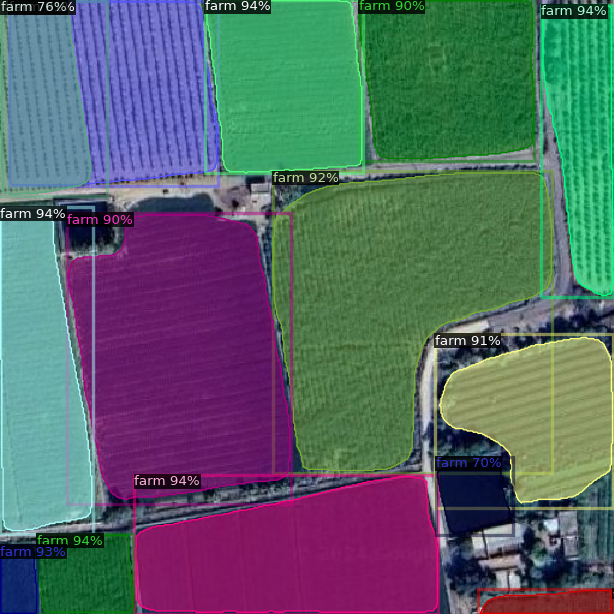

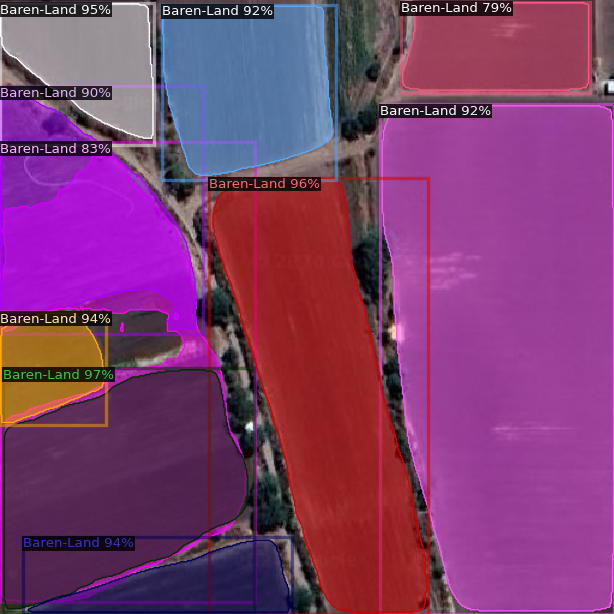

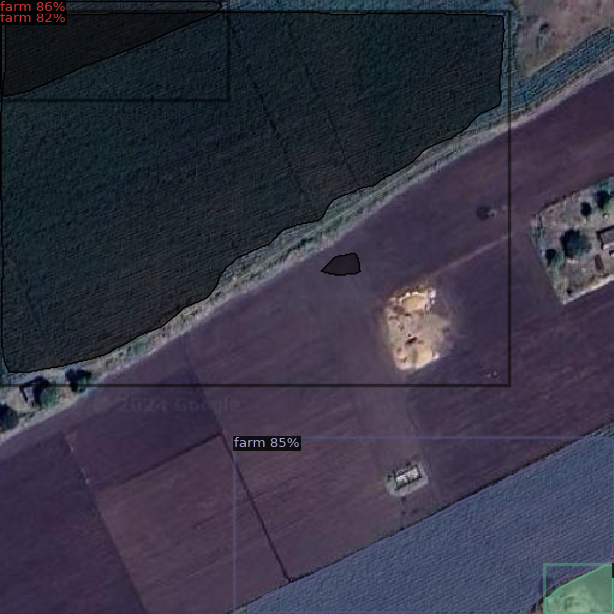

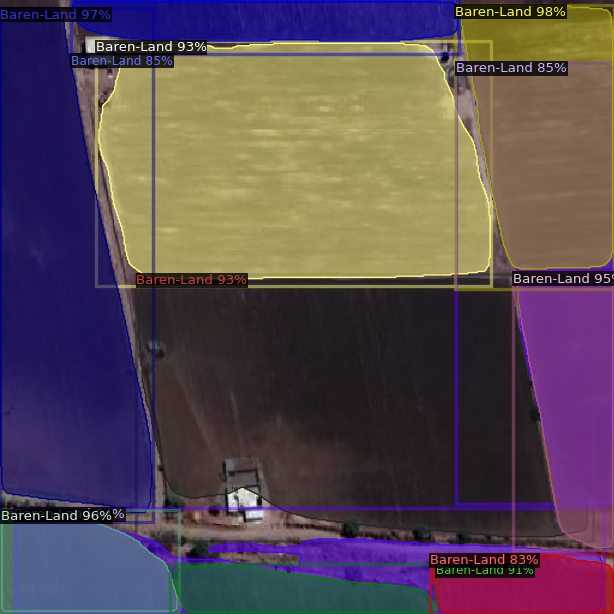

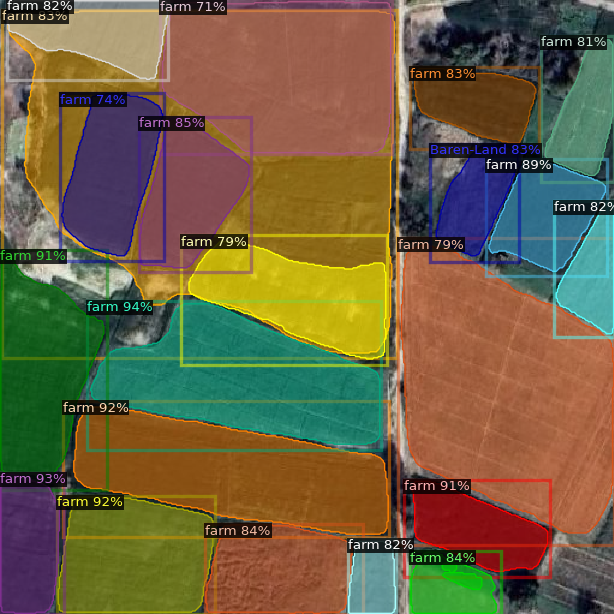

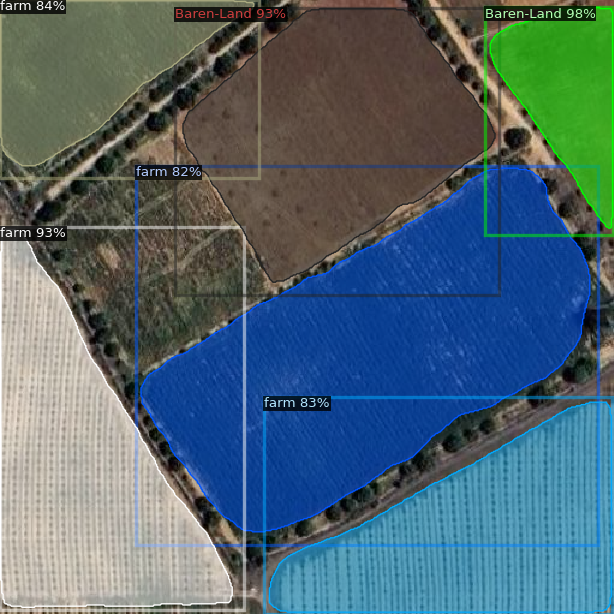

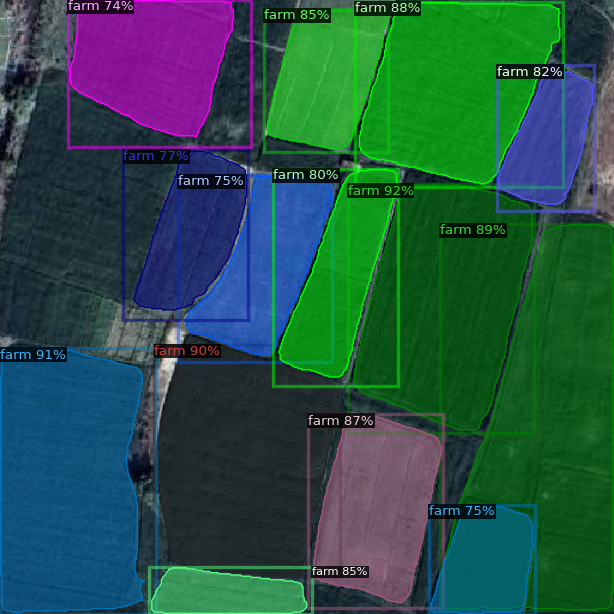

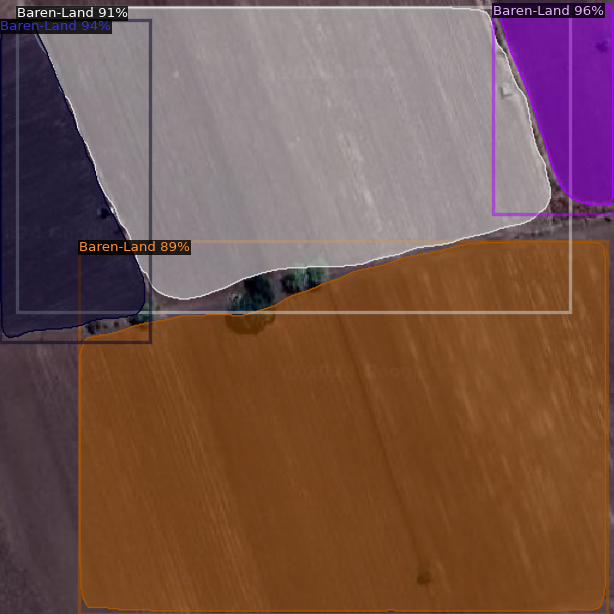

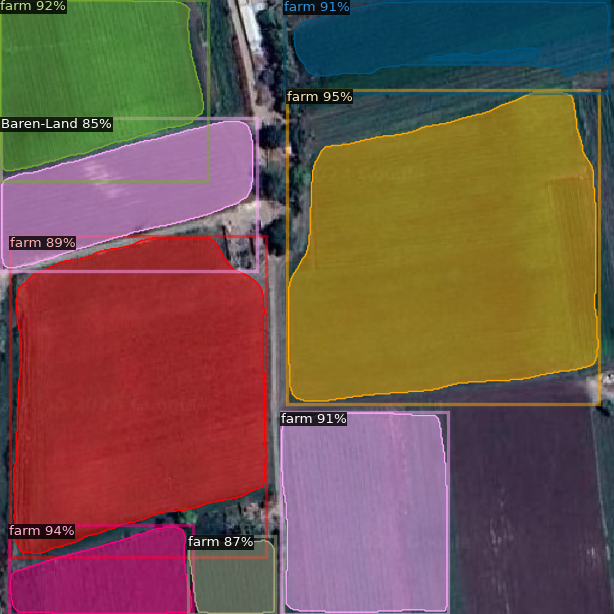

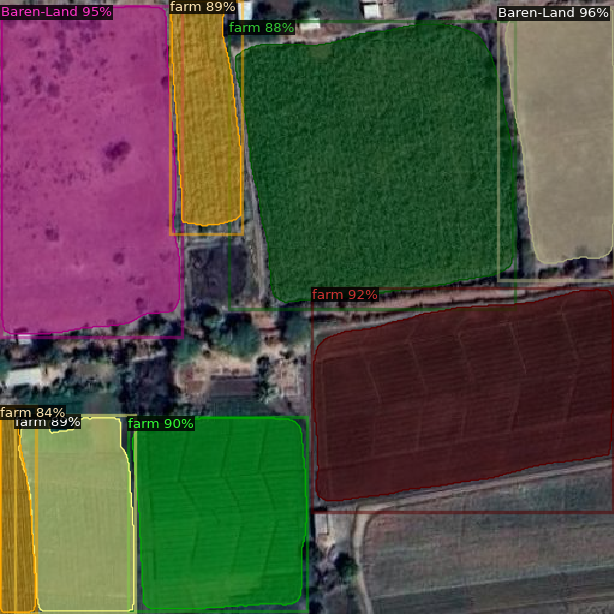

Training completed. Attempting to read metrics:
First 1000 characters of the metrics file:
{"data_time": 0.007159027999932732, "eta_seconds": 339.8236700598227, "fast_rcnn/cls_accuracy": 0.6015625, "fast_rcnn/false_negative": 0.5434027777777778, "fast_rcnn/fg_cls_accuracy": 0.22974537037037035, "iteration": 19, "loss_box_reg": 0.9244534075260162, "loss_cls": 1.2370085716247559, "loss_mask": 0.6921447813510895, "loss_rpn_cls": 0.9079872369766235, "loss_rpn_loc": 0.1146451085805893, "lr": 4.99525e-06, "mask_rcnn/accuracy": 0.4719088807397959, "mask_rcnn/false_negative": 0.3190944459777437, "mask_rcnn/false_positive": 0.8963726185406384, "rank_data_time": 0.007159027999932732, "roi_head/num_bg_samples": 96.0, "roi_head/num_fg_samples": 32.0, "rpn/num_neg_anchors": 201.25, "rpn/num_pos_anchors": 54.75, "time": 0.34675884699981907, "total_loss": 3.8564397245645523}
{"data_time": 0.006433796000692382, "eta_seconds": 322.7392300798965, "fast_rcnn/cls_accuracy": 0.705078125, "fast_rcnn/false_n

In [ ]:
# Try to import cv2_imshow from google.colab.patches
try:
    from google.colab.patches import cv2_imshow
    is_colab = True
except ImportError:
    is_colab = False

# Visualize predictions
def visualize_prediction(img_path, predictor):
    im = cv2.imread(img_path)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    return out.get_image()[:, :, ::-1]

# Visualize a few test images
test_dataset = DatasetCatalog.get("farm_test")
for d in random.sample(test_dataset, 10):
    img = visualize_prediction(d["file_name"], predictor)
    if is_colab:
        cv2_imshow(img)  # This is a Colab-specific function to display images
    else:
        cv2.imshow("Prediction", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

print("Training completed. Attempting to read metrics:")

metrics_file = os.path.join(cfg.OUTPUT_DIR, "metrics.json")

if not os.path.exists(metrics_file):
    print(f"Metrics file not found at {metrics_file}")
else:
    try:
        with open(metrics_file, 'r') as f:
            content = f.read()
            print(f"First 1000 characters of the metrics file:")
            print(content[:1000])

            # Try to parse each line as a separate JSON object
            metrics = []
            for line in content.split('\n'):
                if line.strip():
                    try:
                        metrics.append(json.loads(line))
                    except json.JSONDecodeError:
                        print(f"Failed to parse line: {line}")

            if metrics:
                print(f"\nSuccessfully parsed {len(metrics)} metric entries.")
                print("Final training loss:", metrics[-1].get('total_loss', 'N/A'))
            else:
                print("No valid metric entries found.")
    except Exception as e:
        print(f"Error reading metrics file: {str(e)}")

# Print test set metrics
print(f"\nTest set metrics:")
if 'results' in locals() and 'segm' in results:
    for k, v in results["segm"].items():
        print(f"{k}: {v}")
else:
    print("Test set results not available.")

[07/02 12:23:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/BISAG/farm-data/farm_segmentation_output/model_final.pth ...
Unique category IDs found: [1, 2]
{'instances': Instances(num_instances=10, image_height=512, image_width=512, fields=[pred_boxes: Boxes(tensor([[185.7072, 257.0015, 512.0000, 496.7494],
        [209.3317, 420.2899, 512.0000, 512.0000],
        [226.2343, 156.5969, 512.0000, 331.8204],
        [ 18.0644, 347.2019, 181.2894, 510.3842],
        [154.0290,   0.0000, 511.4141, 211.9089],
        [  0.0000,   0.0000, 162.8786,  95.2697],
        [  0.0000,  72.8943, 231.1949, 354.3223],
        [  0.0000, 366.0513,  23.7444, 509.8909],
        [461.4810, 415.9898, 512.0000, 511.7185],
        [  0.0000,  80.8168, 224.7070, 363.3456]], device='cuda:0')), scores: tensor([0.9512, 0.9086, 0.9076, 0.7751, 0.7422, 0.7080, 0.6644, 0.6142, 0.5715,
        0.5160], device='cuda:0'), pred_classes: tensor([1, 1, 1, 1, 1, 1, 1, 1, 

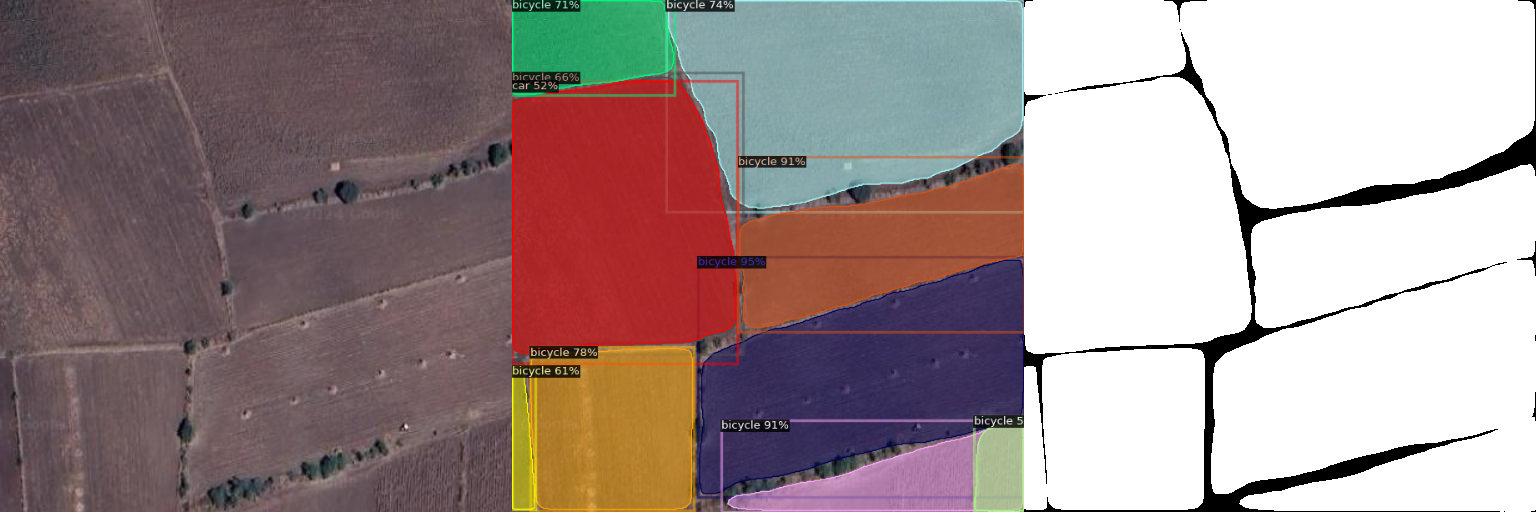

{'instances': Instances(num_instances=7, image_height=512, image_width=512, fields=[pred_boxes: Boxes(tensor([[  0.6100, 443.8188, 182.7090, 511.3273],
        [  0.0000,   0.0000, 158.0667, 198.1355],
        [183.7985, 464.7143, 509.0749, 510.8877],
        [  0.0000, 172.7409, 209.9802, 448.1337],
        [252.5134,   0.7694, 512.0000,  37.6420],
        [167.3181,   1.9538, 512.0000, 493.0547],
        [  0.9927, 376.9794,  40.6833, 435.7191]], device='cuda:0')), scores: tensor([0.9406, 0.8409, 0.8387, 0.8297, 0.8177, 0.7959, 0.6908],
       device='cuda:0'), pred_classes: tensor([1, 1, 1, 1, 1, 1, 2], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, Fal

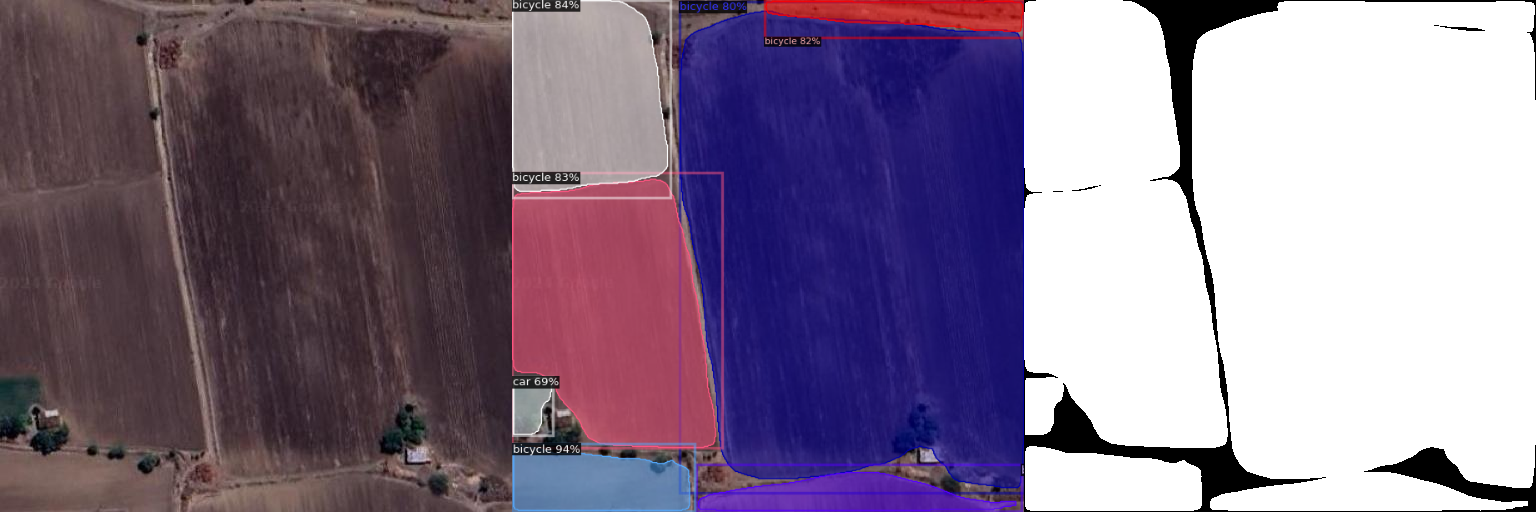

{'instances': Instances(num_instances=16, image_height=512, image_width=512, fields=[pred_boxes: Boxes(tensor([[2.2016e+02, 0.0000e+00, 3.8547e+02, 2.0194e+02],
        [4.7581e+02, 1.5403e+00, 5.1184e+02, 1.4811e+02],
        [4.4657e+00, 0.0000e+00, 2.1449e+02, 1.6727e+02],
        [2.1545e+02, 3.4709e+02, 5.1029e+02, 5.1197e+02],
        [3.7506e+02, 2.8910e+00, 4.9101e+02, 2.1451e+02],
        [1.1872e+02, 1.7853e-01, 2.2263e+02, 1.6767e+02],
        [1.7366e+01, 0.0000e+00, 1.2369e+02, 1.6179e+02],
        [9.5436e-01, 2.1118e-01, 5.0358e+01, 5.1984e+01],
        [6.0099e-01, 7.5407e+00, 4.9460e+01, 1.6060e+02],
        [5.1188e+01, 3.6361e-01, 1.2297e+02, 5.4740e+01],
        [2.5275e+02, 0.0000e+00, 4.9693e+02, 2.1475e+02],
        [2.2359e+02, 3.1735e+00, 3.0668e+02, 1.9050e+02],
        [1.4020e+01, 3.1377e+02, 4.2954e+02, 5.1200e+02],
        [4.0682e+00, 1.5612e+02, 5.1200e+02, 3.5206e+02],
        [2.9275e+02, 7.7005e+01, 3.7887e+02, 1.9838e+02],
        [2.8442e+02, 4.6039

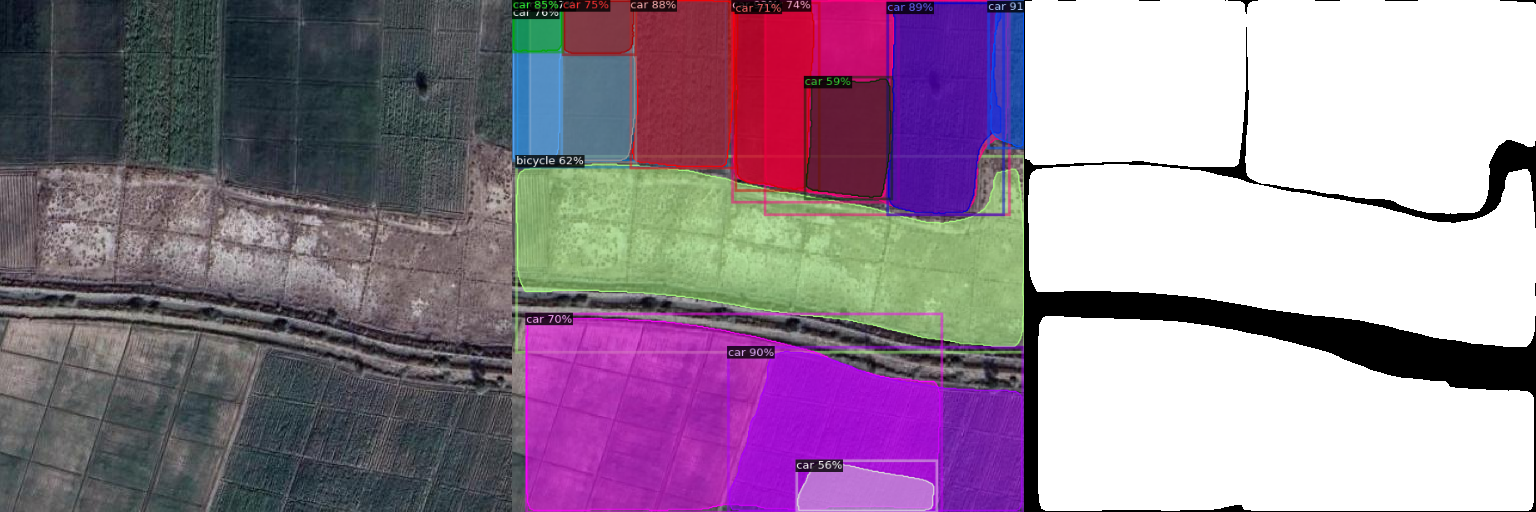

Training completed. Attempting to read metrics:
Metrics file not found at ./output/metrics.json

Test set metrics:
AP: 51.894069377033844
AP50: 69.51150044334011
AP75: 56.104206814093
APs: 22.866469421520605
APm: 42.547194058162084
APl: 59.94598450836619
AP-farm: 51.114565969256276
AP-Baren-Land: 52.67357278481142


In [ ]:
import os
import random
import json
import numpy as np
import cv2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

# Try to import cv2_imshow from google.colab.patches
try:
    from google.colab.patches import cv2_imshow
    is_colab = True
except ImportError:
    is_colab = False

# Function to visualize predictions
def visualize_prediction(img_path, predictor):
    im = cv2.imread(img_path)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    return im, out.get_image()[:, :, ::-1], outputs

# Resize image to match the height of the original image
def resize_to_match_height(img, target_height):
    height, width = img.shape[:2]
    scale_factor = target_height / height
    new_width = int(width * scale_factor)
    resized_img = cv2.resize(img, (new_width, target_height))
    return resized_img

# Load the configuration and model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/farm-data/farm_segmentation_output/model_final.pth"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # Adjust the number of classes as per your dataset
predictor = DefaultPredictor(cfg)

# Visualize a few test images
test_dataset = DatasetCatalog.get("farm_test")
for d in random.sample(test_dataset, 3):
    original_img, predicted_img, outputs = visualize_prediction(d["file_name"], predictor)
    print(outputs)

    # Get the masks
    if outputs["instances"].has("pred_masks"):
        masks = outputs["instances"].pred_masks.to("cpu").numpy()

        # Create binary mask
        if masks.size > 0:
            binary_mask = np.zeros_like(masks[0], dtype=np.uint8)
            for mask in masks:
                binary_mask = np.logical_or(binary_mask, mask)
            binary_mask = (binary_mask * 255).astype(np.uint8)
        else:
            binary_mask = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)
    else:
        binary_mask = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)

    # Resize images to match the height of the original image
    target_height = original_img.shape[0]
    predicted_img = resize_to_match_height(predicted_img, target_height)
    binary_mask = resize_to_match_height(cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), target_height)

    # Stack the images horizontally
    combined_img = np.hstack((original_img, predicted_img, binary_mask))

    # Display the combined image
    if is_colab:
        cv2_imshow(combined_img)  # This is a Colab-specific function to display images
    else:
        cv2.imshow("Prediction", combined_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

print("Training completed. Attempting to read metrics:")

metrics_file = os.path.join(cfg.OUTPUT_DIR, "metrics.json")

if not os.path.exists(metrics_file):
    print(f"Metrics file not found at {metrics_file}")
else:
    try:
        with open(metrics_file, 'r') as f:
            content = f.read()
            print(f"First 1000 characters of the metrics file:")
            print(content[:1000])

            # Try to parse each line as a separate JSON object
            metrics = []
            for line in content.split('\n'):
                if line.strip():
                    try:
                        metrics.append(json.loads(line))
                    except json.JSONDecodeError:
                        print(f"Failed to parse line: {line}")

            if metrics:
                print(f"\nSuccessfully parsed {len(metrics)} metric entries.")
                print("Final training loss:", metrics[-1].get('total_loss', 'N/A'))
            else:
                print("No valid metric entries found.")
    except Exception as e:
        print(f"Error reading metrics file: {str(e)}")

# Print test set metrics
print(f"\nTest set metrics:")
if 'results' in locals() and 'segm' in results:
    for k, v in results["segm"].items():
        print(f"{k}: {v}")
else:
    print("Test set results not available.")


512


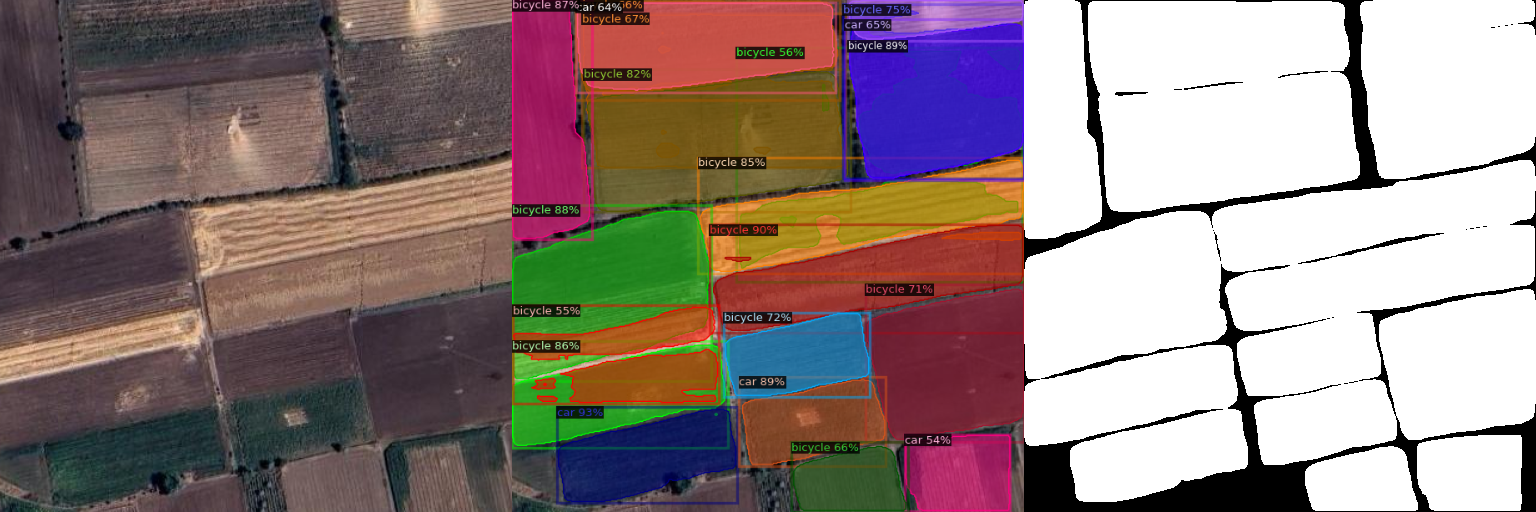

In [ ]:
from PIL import Image

# Load TIFF image
tiff_image_path = "/content/drive/MyDrive/BISAG/farm-data/DETECTRON2_TEST_IMAGE_10.tif"
tiff_image = Image.open(tiff_image_path)
image = np.array(tiff_image)

# Ensure the image is in BGR format as OpenCV expects
if image.shape[2] == 4:  # If the image has an alpha channel
    image = image[:, :, :3]
image = image[:, :, ::-1]  # Convert RGB to BGR

original_img, predicted_img, outputs = visualize_prediction(tiff_image_path, predictor)
# Get the masks
if outputs["instances"].has("pred_masks"):
    masks = outputs["instances"].pred_masks.to("cpu").numpy()

    # Create binary mask
    if masks.size > 0:
        binary_mask = np.zeros_like(masks[0], dtype=np.uint8)
        for mask in masks:
            binary_mask = np.logical_or(binary_mask, mask)
        binary_mask = (binary_mask * 255).astype(np.uint8)
    else:
        binary_mask = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)
else:
    binary_mask = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)

# Resize images to match the height of the original image
target_height = original_img.shape[0]
print(target_height)
predicted_img = resize_to_match_height(predicted_img, target_height)
binary_mask = resize_to_match_height(cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), target_height)

# Stack the images horizontally
combined_img = np.hstack((original_img, predicted_img, binary_mask))

# Display the combined image
if is_colab:
    cv2_imshow(combined_img)  # This is a Colab-specific function to display images
else:
    cv2.imshow("Prediction", combined_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# Perform prediction
# outputs = predictor(image)

# Continue with processing as before


In [13]:
from PIL import Image

# Load TIFF image
tiff_image_path = "images/1.tif"
tiff_image = Image.open(tiff_image_path)
image = np.array(tiff_image)

# Ensure the image is in BGR format as OpenCV expects
if image.shape[2] == 4:  # If the image has an alpha channel
    image = image[:, :, :3]
image = image[:, :, ::-1]  # Convert RGB to BGR

# Function to visualize predictions
def visualize_prediction(img_path, predictor):
    im = cv2.imread(img_path)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    return im, out.get_image()[:, :, ::-1], outputs

# Resize image to match the height of the original image
def resize_to_match_height(img, target_height):
    height, width = img.shape[:2]
    scale_factor = target_height / height
    new_width = int(width * scale_factor)
    resized_img = cv2.resize(img, (new_width, target_height))
    return resized_img

original_img, predicted_img, outputs = visualize_prediction(tiff_image_path, predictor)
# Get the masks
if outputs["instances"].has("pred_masks"):
    masks = outputs["instances"].pred_masks.to("cpu").numpy()

    # Create binary mask
    if masks.size > 0:
        binary_mask = np.zeros_like(masks[0], dtype=np.uint8)
        for mask in masks:
            binary_mask = np.logical_or(binary_mask, mask)
        binary_mask = (binary_mask * 255).astype(np.uint8)
    else:
        binary_mask = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)
else:
    binary_mask = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)

# Resize images to match the height of the original image
target_height = original_img.shape[0]
print(target_height)
predicted_img = resize_to_match_height(predicted_img, target_height)
binary_mask = resize_to_match_height(cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), target_height)

# Stack the images horizontally
combined_img = np.hstack((original_img, predicted_img, binary_mask))

# Display the combined image
# if is_colab:
#     cv2_imshow(combined_img)  # This is a Colab-specific function to display images
# else:
# cv2.imshow("Prediction", combined_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite("output.jpg", combined_img)
# Perform prediction
# outputs = predictor(image)

# Continue with processing as before


1355


True